In [90]:
import pandas as pd

In [91]:
import requests
from bs4 import BeautifulSoup

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    response.raise_for_status()  # Ensure request was successful

    # Parse content
    parsed_content = BeautifulSoup(response.content, 'html.parser')

    for para in parsed_content.find_all("div", {"class": "body"}):
        review_text = para.find("div", {"class": "text_content"}).get_text(strip=True) if para.find("div", {"class": "text_content"}) else "N/A"
        seat_type = para.find("td", {"class": "review-rating-header cabin_flown"}).find_next("td").get_text(strip=True) if para.find("td", {"class": "review-rating-header cabin_flown"}) else "N/A"
        date_flown = para.find("td", {"class": "review-rating-header date_flown"}).find_next("td").get_text(strip=True) if para.find("td", {"class": "review-rating-header date_flown"}) else "N/A"
        recommend = para.find("td", {"class": "review-rating-header recommended"}).find_next("td").get_text(strip=True) if para.find("td", {"class": "review-rating-header recommended"}) else "N/A"
        country = para.find("h3", class_="text_sub_header").get_text(strip=True).split("(")[-1].split(")")[0].strip() if para.find("h3", class_="text_sub_header") and ")" in para.find("h3", class_="text_sub_header").get_text(strip=True) else "N/A"

        reviews.append({
            "review_text": review_text,
            "seat_type": seat_type,
            "date_flown": date_flown,
            "recommend": recommend,
            "country": country
        })

print(f"   ---> {len(reviews)} reviews collected")

# Show first 5 reviews
for review in reviews[:5]:
    print(review)


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
   ---> 1000 reviews collected
{'review_text': '✅Trip Verified|  We booked four seats to fly to London from Toronto. I can\'t reclaim the precise details of the booking from BA, but it ran to more than CDN $100 per seat, each way. We had booked specific seats to give our grandson a window seat, and his mother an aisle seat. Come check-in at YYZ, we found our seat choices changed, and we were occupying a row of four seats in the centre of the aircraft, clearly not what we had paid for. I understand that sometimes the airline has to change aircraft, and that was obviously the case here, but I decided that as BA hadn\'t honoured my paid seat selection that they should give me my seat reservation money back. I made a claim with BA using their online claims process, but my claim was denied, on the grounds that we had taken the fligh

In [133]:
df = pd.DataFrame(reviews)
df.head()

,review_text,seat_type,date_flown,recommend,country
0,✅Trip Verified| We booked four seats to fly t...,Premium Economy,July 2025,no,Canada
1,✅Trip Verified| Really poor baggage drop expe...,Economy Class,July 2025,no,United Kingdom
2,✅Trip Verified| BA 823 on 9th August 2025 fr...,Economy Class,August 2025,yes,United Kingdom
3,✅Trip Verified| Spent 1.5 hours in the check-...,Economy Class,July 2025,no,United Kingdom
4,"✅Trip Verified| Flight was one hour late, mea...",Economy Class,August 2025,no,United Kingdom


In [140]:
# Define a function to classify the reviews
def classify_trip(review):
    if "Trip Verified" in review:
        return 1
    else:
        return 0

# Apply the function to create a new column
df['Trip_Class_verified'] = df['review_text'].apply(classify_trip)

# Inspect the results
print(df[['review_text', 'Trip_Class_verified']].head())

                                         review_text  Trip_Class_verified
0  ✅Trip Verified|  We booked four seats to fly t...                    1
1  ✅Trip Verified|  Really poor baggage drop expe...                    1
2  ✅Trip Verified|   BA 823 on 9th August 2025 fr...                    1
3  ✅Trip Verified|  Spent 1.5 hours in the check-...                    1
4  ✅Trip Verified|  Flight was one hour late, mea...                    1


In [141]:
df.to_csv("BA_reviews.csv")

In [142]:
import re

# Define cleaning function
def clean_reviews(review):
    review = str(review)  # Ensure it's a string
    review = re.sub(r"[']", "", review)
    review = re.sub(r'[\"]', "", review)
    review = re.sub(r"[[]", "", review)
    review = re.sub(r"✅Trip Verified", "", review)
    review = re.sub(r"Not Verified", "", review)
    review = review.replace("|", "").strip()
    return review

# Apply cleaning function
df['cleaned_reviews'] = df['review_text'].apply(clean_reviews)

# Print sample output
print(df[['cleaned_reviews']].head())


                                     cleaned_reviews
0  We booked four seats to fly to London from Tor...
1  Really poor baggage drop experience at British...
2  BA 823 on 9th August 2025 from Dublin to Londo...
3  Spent 1.5 hours in the check-in queue. The que...
4  Flight was one hour late, meaning public trans...


In [144]:
df.head()

,review_text,seat_type,date_flown,recommend,country,trip_verified_flag,TripClass,Trip_Class_verified,cleaned_reviews
0,✅Trip Verified| We booked four seats to fly t...,Premium Economy,July 2025,no,Canada,0,1,1,We booked four seats to fly to London from Tor...
1,✅Trip Verified| Really poor baggage drop expe...,Economy Class,July 2025,no,United Kingdom,0,1,1,Really poor baggage drop experience at British...
2,✅Trip Verified| BA 823 on 9th August 2025 fr...,Economy Class,August 2025,yes,United Kingdom,0,1,1,BA 823 on 9th August 2025 from Dublin to Londo...
3,✅Trip Verified| Spent 1.5 hours in the check-...,Economy Class,July 2025,no,United Kingdom,0,1,1,Spent 1.5 hours in the check-in queue. The que...
4,"✅Trip Verified| Flight was one hour late, mea...",Economy Class,August 2025,no,United Kingdom,0,1,1,"Flight was one hour late, meaning public trans..."


In [145]:
df = df.drop(columns=['review_text', 'trip_verified_flag', 'TripClass'])
df.head()

,seat_type,date_flown,recommend,country,Trip_Class_verified,cleaned_reviews
0,Premium Economy,July 2025,no,Canada,1,We booked four seats to fly to London from Tor...
1,Economy Class,July 2025,no,United Kingdom,1,Really poor baggage drop experience at British...
2,Economy Class,August 2025,yes,United Kingdom,1,BA 823 on 9th August 2025 from Dublin to Londo...
3,Economy Class,July 2025,no,United Kingdom,1,Spent 1.5 hours in the check-in queue. The que...
4,Economy Class,August 2025,no,United Kingdom,1,"Flight was one hour late, meaning public trans..."


In [146]:
df.dtypes

seat_type              object
date_flown             object
recommend              object
country                object
Trip_Class_verified     int64
cleaned_reviews        object
dtype: object

In [147]:
df.head()

,seat_type,date_flown,recommend,country,Trip_Class_verified,cleaned_reviews
0,Premium Economy,July 2025,no,Canada,1,We booked four seats to fly to London from Tor...
1,Economy Class,July 2025,no,United Kingdom,1,Really poor baggage drop experience at British...
2,Economy Class,August 2025,yes,United Kingdom,1,BA 823 on 9th August 2025 from Dublin to Londo...
3,Economy Class,July 2025,no,United Kingdom,1,Spent 1.5 hours in the check-in queue. The que...
4,Economy Class,August 2025,no,United Kingdom,1,"Flight was one hour late, meaning public trans..."


In [148]:
df.cleaned_reviews

0      We booked four seats to fly to London from Tor...
1      Really poor baggage drop experience at British...
2      BA 823 on 9th August 2025 from Dublin to Londo...
3      Spent 1.5 hours in the check-in queue. The que...
4      Flight was one hour late, meaning public trans...
                             ...                        
995    Buenos Aires to London Heathrow rwturn. The ai...
996    Mexico City to Barcelona via London Heathrow. ...
997    Great all round. BA2591, 11 October. Good pric...
998    Flew back from Abu Dhabi in World traveller pl...
999    Flew from London Heathrow to Abu Dhabi. Honest...
Name: cleaned_reviews, Length: 1000, dtype: object

In [149]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chint\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chint\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [150]:
stop_words = set(stopwords.words('english'))

# Basic preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(filtered_tokens)

# Apply preprocessing
df['processed_reviews'] = df['cleaned_reviews'].apply(preprocess_text)

In [151]:
df.head()

,seat_type,date_flown,recommend,country,Trip_Class_verified,cleaned_reviews,processed_reviews
0,Premium Economy,July 2025,no,Canada,1,We booked four seats to fly to London from Tor...,booked four seats fly london toronto cant recl...
1,Economy Class,July 2025,no,United Kingdom,1,Really poor baggage drop experience at British...,really poor baggage drop experience british ai...
2,Economy Class,August 2025,yes,United Kingdom,1,BA 823 on 9th August 2025 from Dublin to Londo...,ba august dublin london heathrow airport absol...
3,Economy Class,July 2025,no,United Kingdom,1,Spent 1.5 hours in the check-in queue. The que...,spent hours queue queue went outside terminal ...
4,Economy Class,August 2025,no,United Kingdom,1,"Flight was one hour late, meaning public trans...",flight one hour late meaning public transport ...


In [153]:
sentiment_data = df[["processed_reviews","Trip_Class_verified"]]

In [154]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (only required once)
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()
#df = pd.DataFrame({cleaned_reviews})


# Define a function for sentiment analysis
def get_sentiment(cleaned_reviews):
    score = sia.polarity_scores(cleaned_reviews)['compound']
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply function to review_text column
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Print DataFrame with Sentiment Analysis
print(df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chint\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


           seat_type      date_flown recommend         country  \
0    Premium Economy       July 2025        no          Canada   
1      Economy Class       July 2025        no  United Kingdom   
2      Economy Class     August 2025       yes  United Kingdom   
3      Economy Class       July 2025        no  United Kingdom   
4      Economy Class     August 2025        no  United Kingdom   
..               ...             ...       ...             ...   
995  Premium Economy  September 2019        no       Argentina   
996    Economy Class  September 2019       yes          Mexico   
997    Economy Class  September 2019       yes  United Kingdom   
998  Premium Economy  September 2019        no  United Kingdom   
999    Economy Class    October 2019       yes  United Kingdom   

     Trip_Class_verified                                    cleaned_reviews  \
0                      1  We booked four seats to fly to London from Tor...   
1                      1  Really poor baggage dro

In [155]:
print(df['sentiment'].value_counts())

sentiment
Negative    525
Positive    458
Neutral      17
Name: count, dtype: int64


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\chint\AppData\Local\Temp\ipykernel_35700\1003554302.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


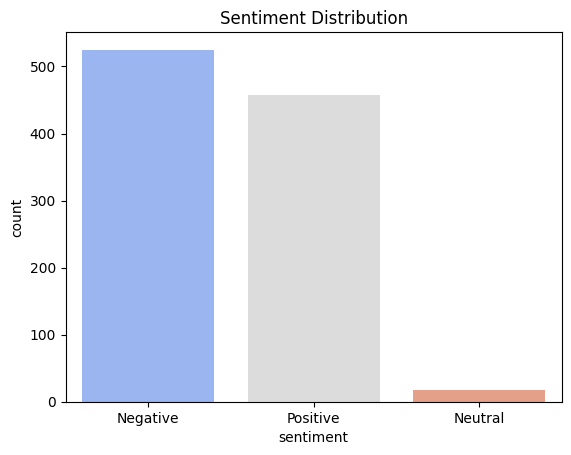

In [157]:
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

C:\Users\chint\AppData\Local\Temp\ipykernel_35700\3158546387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_data, x='Trip_Class_verified', palette='coolwarm')


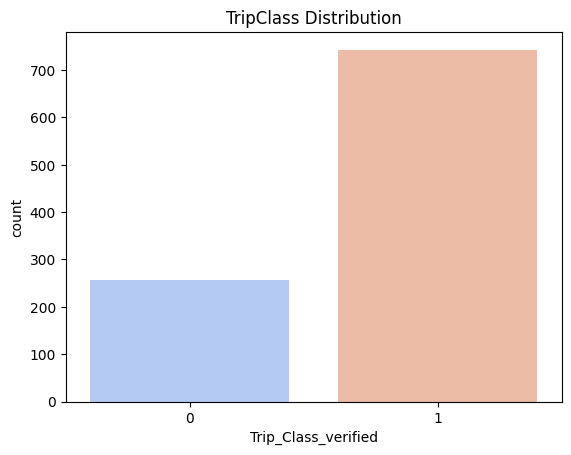

In [159]:
sns.countplot(data=sentiment_data, x='Trip_Class_verified', palette='coolwarm')
plt.title("TripClass Distribution")
plt.show()

C:\Users\chint\AppData\Local\Temp\ipykernel_35700\4153486935.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="seat_type", order=seat_order, palette='coolwarm')


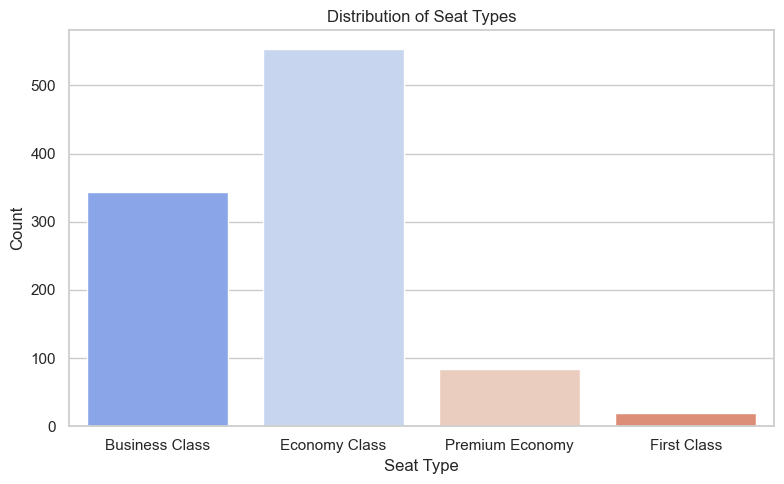

In [172]:
# --- 1) Distribution of Seat Types ---
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Neat order if these exist in your data
seat_order = [s for s in ["Business Class", "Economy Class", "Premium Economy", "First Class"]
              if s in df["seat_type"].unique()]

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="seat_type", order=seat_order, palette='coolwarm')
plt.title("Distribution of Seat Types")
plt.xlabel("Seat Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


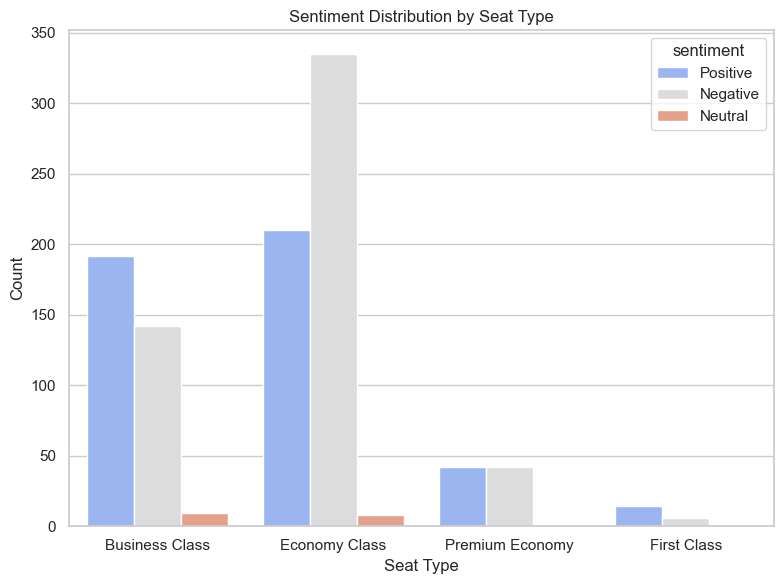

In [173]:
# --- 2) Sentiment Distribution by Seat Type ---
# Make sure sentiment labels are consistent
df["sentiment"] = df["sentiment"].astype(str).str.title()  # e.g., Positive/Negative/Neutral

sent_order = [s for s in ["Positive", "Negative", "Neutral"]
              if s in df["sentiment"].unique()]

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="seat_type", hue="sentiment",
              order=seat_order, hue_order=sent_order, palette='coolwarm')
plt.title("Sentiment Distribution by Seat Type")
plt.xlabel("Seat Type")
plt.ylabel("Count")
plt.legend(title="sentiment")
plt.tight_layout()
plt.show()


In [160]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chint\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chint\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chint\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [161]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chint\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [162]:
import string
lemmatizer = WordNetLemmatizer()
default_stopwords = set(stopwords.words('english'))
custom_stopwords = {"get", "passport", "hong", "new", "ran", "then","without", "several", "room", "boarding", "plane", "missed", "through", "found", "ahead", "crew", "do", "can","but", "cape", "entertainment", "days", "airlines", "their", "cabin", "really", "drink", "bag", "said", "passengers", "economy","drinks", "meal", "first", "all", "minutes", "late", "food", "last", "made", "flights", "call", "another", "now", "put", "better", "way", "so", "could", "took", "off", "from", "airport", "customer", "passenger", "premium", "business", "service", "class", "staff", "an", "when", "club", "ground", "by", "water", "other", "lines", "ended", "up", "hours", "before", "as", "well", "me", "that", "our", "seats", "are", "fly", "again", "will", "never", "even", "though", "more", "than", "there", "no", "with", "if", "you", "would","be", "for", "my", "them", "very", "good", "we", "were", "had", "did", "not", "and", "have", "been", "they", "this", "is","the", "on", "of", "to", "british", "airways", "in", "it", "was", "check","in","at", "told", "day", "airways", "airline", "heathrow", "british", "airway", "london", "seat", "flight", "ba", "hour", "time", "felt", "back", "need", "nice", "take", "got", "called", "given", "find", "point", "sent", "went", "dont", "want", "one", "love", "due", "try", "asked", "make", "two", "used", "much", "someone", "say", "give", "next", "help", "1hr", "many", "us"}  
df.head()


,seat_type,date_flown,recommend,country,Trip_Class_verified,cleaned_reviews,processed_reviews,sentiment
0,Premium Economy,July 2025,no,Canada,1,We booked four seats to fly to London from Tor...,booked four seats fly london toronto cant recl...,Negative
1,Economy Class,July 2025,no,United Kingdom,1,Really poor baggage drop experience at British...,really poor baggage drop experience british ai...,Negative
2,Economy Class,August 2025,yes,United Kingdom,1,BA 823 on 9th August 2025 from Dublin to Londo...,ba august dublin london heathrow airport absol...,Positive
3,Economy Class,July 2025,no,United Kingdom,1,Spent 1.5 hours in the check-in queue. The que...,spent hours queue queue went outside terminal ...,Negative
4,Economy Class,August 2025,no,United Kingdom,1,"Flight was one hour late, meaning public trans...",flight one hour late meaning public transport ...,Negative


In [163]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower().translate(str.maketrans('', '', string.punctuation))  
    tokens = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]
    return " ".join(filtered_tokens)


In [164]:
df['new_reviews'] = df['cleaned_reviews'].apply(clean_text)

In [165]:
print(df[['cleaned_reviews', 'new_reviews']])

                                       cleaned_reviews  \
0    We booked four seats to fly to London from Tor...   
1    Really poor baggage drop experience at British...   
2    BA 823 on 9th August 2025 from Dublin to Londo...   
3    Spent 1.5 hours in the check-in queue. The que...   
4    Flight was one hour late, meaning public trans...   
..                                                 ...   
995  Buenos Aires to London Heathrow rwturn. The ai...   
996  Mexico City to Barcelona via London Heathrow. ...   
997  Great all round. BA2591, 11 October. Good pric...   
998  Flew back from Abu Dhabi in World traveller pl...   
999  Flew from London Heathrow to Abu Dhabi. Honest...   

                                           new_reviews  
0    booked four toronto i cant reclaim precise det...  
1    poor baggage drop experience s flagship termin...  
2    august dublin absolute pleasure checkin just e...  
3    spent checkin queue queue outside terminal are...  
4    meaning publi

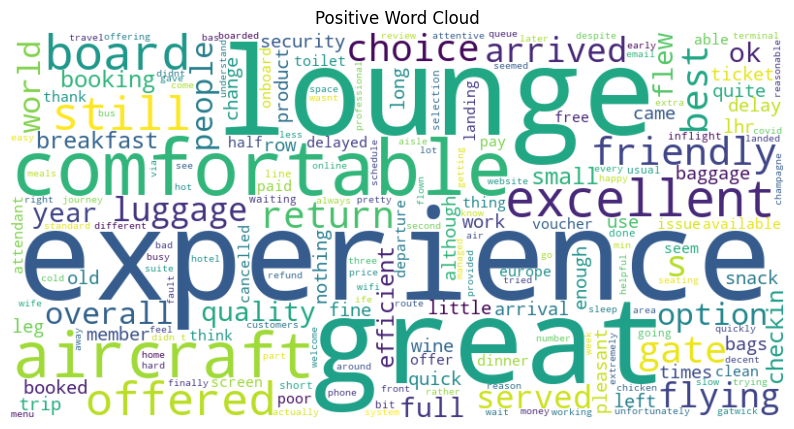

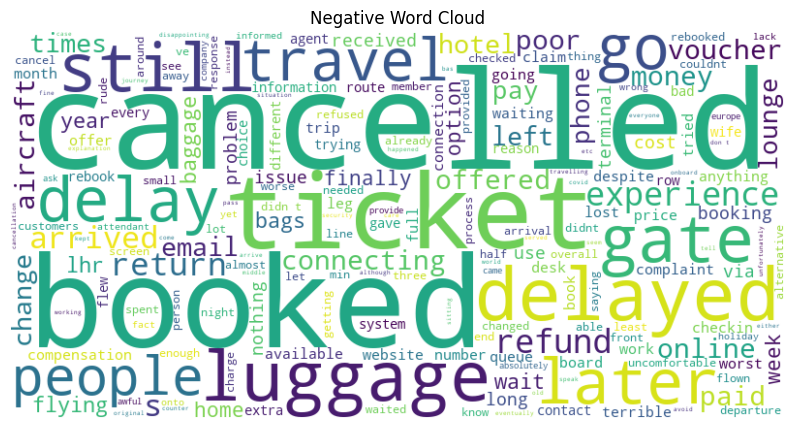

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text_series, title):
    text_series = text_series.fillna("").astype(str)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_series))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive WordCloud
positive_reviews = df[df['sentiment'] == 'Positive']['new_reviews']   # use your cleaned column
generate_wordcloud(positive_reviews, "Positive Word Cloud")

# Negative WordCloud
negative_reviews = df[df['sentiment'] == 'Negative']['new_reviews']
generate_wordcloud(negative_reviews, "Negative Word Cloud")


C:\Users\chint\AppData\Local\Temp\ipykernel_35700\296842745.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_counts, x='count', y='bigram', palette='viridis')


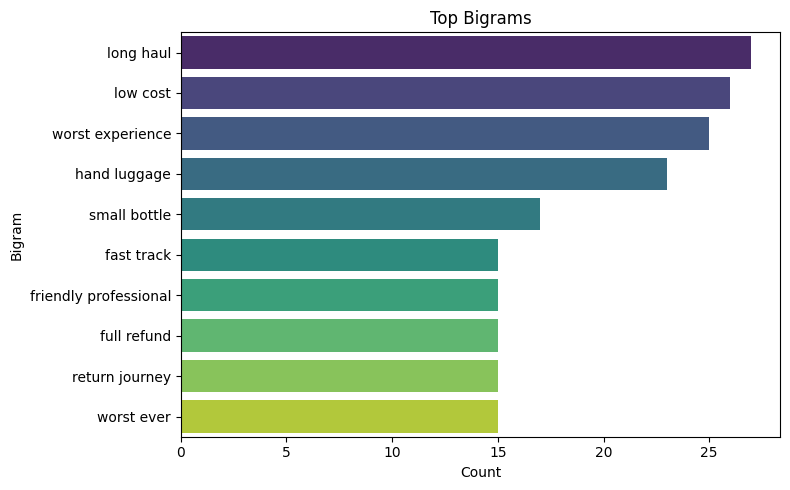

In [167]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10)
bigrams = vectorizer.fit_transform(df['new_reviews'].fillna(""))

bigram_counts = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'count': bigrams.toarray().sum(axis=0)
}).sort_values(by='count', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=bigram_counts, x='count', y='bigram', palette='viridis')
plt.title("Top Bigrams")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()


In [168]:
print(bigram_counts.head())

             bigram  count
4         long haul     27
5          low cost     26
9  worst experience     25
3      hand luggage     23
7      small bottle     17


In [169]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Document-term matrix from your cleaned text
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
review_matrix = vectorizer.fit_transform(df["new_reviews"].fillna(""))

# LDA with 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(review_matrix)

# Display top 10 terms per topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-10:]
    print(f"Topic {idx + 1}:")
    print([feature_names[i] for i in top_indices])


Topic 1:
['bags', 'people', 'cancelled', 'booked', 'delayed', 'luggage', 'like', 'experience', 'just', 'gate']
Topic 2:
['booked', 'left', 'checkin', 'small', 'experience', 'long', 'lounge', 'just', 'aircraft', 'luggage']
Topic 3:
['delayed', 'baggage', 'luggage', 'just', 'offered', 'cancelled', 'aircraft', 'return', 'experience', 'lounge']
Topic 4:
['board', 'change', 'times', 'flying', 'ticket', 'booked', 'cancelled', 'experience', 'return', 'just']
Topic 5:
['refund', 'phone', 'pay', 'arrived', 'later', 'like', 'cancelled', 'experience', 'just', 'luggage']


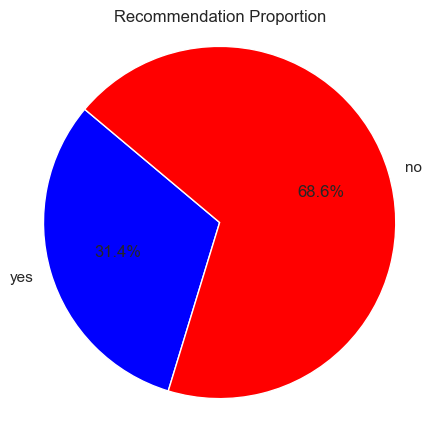

In [174]:

rec = (
    df['recommend']
    .astype(str).str.strip().str.lower()
    .map({'yes':'yes', 'no':'no'})
)

counts = rec.value_counts().reindex(['yes','no']).fillna(0)

plt.figure(figsize=(5,5))
plt.pie(
    counts.values,
    labels=counts.index,
    colors=['blue','red'],        
    autopct='%.1f%%',
    startangle=140,
    wedgeprops={'edgecolor':'white','linewidth':1}
)
plt.title('Recommendation Proportion')
plt.axis('equal')
plt.show()
